Hi there, I'm trying to step into the Financial aspect 

In [1]:
!pip install numpy


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\ASUS\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [8]:
!pip install scipy


In [4]:
!pip install xlrd==0.9.0

  Running setup.py bdist_wheel for xlrd: started
  Running setup.py bdist_wheel for xlrd: finished with status 'done'
  Stored in directory: C:\Users\ASUS\AppData\Local\pip\Cache\wheels\64\9c\4f\218231860a48fec112b161d99cad27598ddaa3e81849bbac7a
Successfully built xlrd


In [5]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

First initialize two empty lists: dates and prices

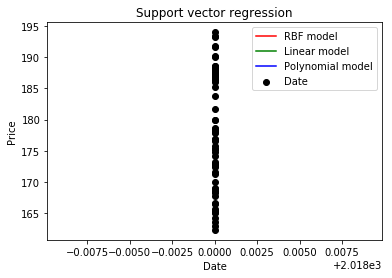

(177.83, 177.83, 177.83)


In [9]:
#First initialize two empty lists: dates and prices
dates = []
prices = []

"Defining function-get_data"

def get_data(filename):
    #the open statement will extract the contents of the CSV file to read it...
     
    with open(filename, 'r') as csvfile:
        #Now creating a file reader variable which csv module will create to read and iterate over the rows of data
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
        return

def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    svr_lin = SVR(kernel= 'linear', C=1e3)
    svr_poly = SVR(kernel= 'poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color = 'black', label = 'Date')
    plt.plot(dates, svr_rbf.predict(dates), color = 'red', label = 'RBF model')
    plt.plot(dates, svr_lin.predict(dates), color = 'green', label = 'Linear model')
    plt.plot(dates, svr_poly.predict(dates), color = 'blue', label = 'Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support vector regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

get_data('HistoricalQuotes.csv')

predicted_price = predict_prices(dates, prices, 5)
print(predicted_price)
